<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Explore-de-data" data-toc-modified-id="Explore-de-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explore de data</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></li><li><span><a href="#Predictive-model" data-toc-modified-id="Predictive-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predictive model</a></span><ul class="toc-item"><li><span><a href="#Run-different-algorithms-on-training-dataset" data-toc-modified-id="Run-different-algorithms-on-training-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Run different algorithms on training dataset</a></span></li><li><span><a href="#Comparing-Algorithms" data-toc-modified-id="Comparing-Algorithms-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Comparing Algorithms</a></span></li><li><span><a href="#Make-predictions-on-Validation-dataset" data-toc-modified-id="Make-predictions-on-Validation-dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Make predictions on Validation dataset</a></span></li></ul></li></ul></div>

# Libraries 

In [24]:
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt 

# Load data

In [5]:
data =  datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df2 = pd.DataFrame(data.target, columns = ["target"])

In [7]:
final = df.join(df2)

## Explore de data

In [10]:
#Statistical Summary of the Dataset
print("\n\nStatistical Summary\n")
display(final.describe())               
print('\n')



Statistical Summary



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Data Visualization 

In [11]:
final.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [13]:
final.hist(edgecolor='black', linewidth=1.2)
plt.show()

#Box and Whisper Plots
final.plot(kind='box',subplots=True,layout=(2,2), sharex=False,sharey=False,title="Boxplot(Class vs cm)")
plt.show()

#Multivariate Plot 
final.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")
plt.title("sepal length (cm) vs sepal width (cm)")
plt.show()

final.plot(kind="scatter", x="petal length (cm)", y="petal width (cm)")
plt.title("petal length (cm) vs petal width (cm)")
plt.show()

ValueError: Layout of 2x2 must be larger than required size 5

<Figure size 432x288 with 0 Axes>

# Predictive model

In [16]:
final.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
# define the x,y variables
y = final["target"]
X = final.drop(["target"], axis = 1)

#With model_selection.train_test_split imported from sklearn, we can split data into test and train sets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2)

## Run different algorithms on training dataset
 

In [28]:
#Linear(LR, LDA) & Non Linear (KNN, CART, NB, SVM)
models = []
models.append(('LR', LogisticRegression( multi_class='ovr')))
models.append(('RDF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
#Evaluate each model in turn
results = []
names = []
print("Model\t","Mean\t\t","Std")
for name, model in models: 
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold,)
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t %f\t (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Model	 Mean		 Std
LR:	 0.941667	 (0.038188)
RDF:	 0.933333	 (0.062361)
KNN:	 0.958333	 (0.041667)
CART:	 0.950000	 (0.055277)
NB:	 0.950000	 (0.055277)
SVM:	 0.966667	 (0.055277)


## Comparing Algorithms


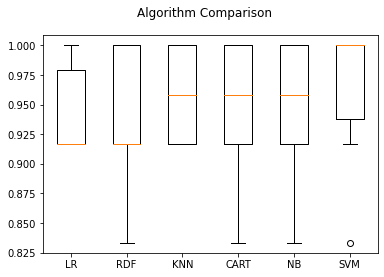

In [29]:
#From the above values, we can see that Support Vector Machines (SVM) has the largest estimated accuracy score.
#Compare mean acccuracy of Algorithms with each other
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make predictions on Validation dataset
 

In [ ]:
s on Validation dataset

from sklearn.svm import SVC
model=SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print("Accuracy=",accuracy_score(Y_validation, predictions),"%\n")
print("Confusion Matrix=\n",confusion_matrix(Y_validation, predictions),"\n")
print("Classification Report=\n",classification_report(Y_validation, predictions))